In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

C:\Users\Abcd\AppData\Local\Temp\ipykernel_4160\3264749705.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
penguin_df=pd.read_csv("penguins_binary_classification.csv")
penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007
...,...,...,...,...,...,...,...
269,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,2009
270,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,2009
271,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,2009
272,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,2009


In [4]:
print(penguin_df.info())
print('\n')
print(penguin_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            274 non-null    object 
 1   island             274 non-null    object 
 2   bill_length_mm     274 non-null    float64
 3   bill_depth_mm      274 non-null    float64
 4   flipper_length_mm  274 non-null    float64
 5   body_mass_g        274 non-null    float64
 6   year               274 non-null    int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 15.1+ KB
None


       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
count      274.000000     274.000000         274.000000   274.000000   
mean        42.702920      16.836131         202.178832  4318.065693   
std          5.195566       2.013410          15.047938   835.933105   
min         32.100000      13.100000         172.000000  2850.000000   
25%         38.350000      15.0000

In [5]:
penguin_df.shape

(274, 7)

In [6]:
penguin_df.nunique

<bound method DataFrame.nunique of     species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen            36.7           19.3              193.0   
4    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
269  Gentoo     Biscoe            47.2           13.7              214.0   
270  Gentoo     Biscoe            46.8           14.3              215.0   
271  Gentoo     Biscoe            50.4           15.7              222.0   
272  Gentoo     Biscoe            45.2           14.8              212.0   
273  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g  year  
0         3750.0  2007  
1 

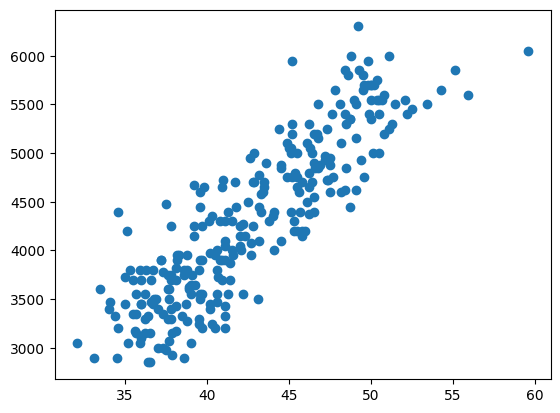

In [7]:
plt.scatter(penguin_df['bill_length_mm'],penguin_df['body_mass_g'])
plt.show()

In [8]:
penguin_df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'year'],
      dtype='object')

In [9]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2007
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2007
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,2007


<Axes: >

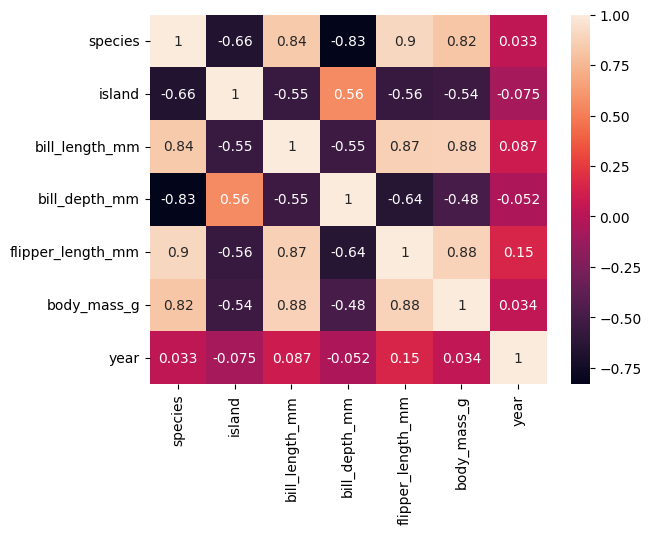

In [11]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
encoder=LabelEncoder()
penguin_df['species']=encoder.fit_transform(penguin_df['species'])
penguin_df['island']=encoder.fit_transform(penguin_df['island'])
sns.heatmap(penguin_df.corr(),annot=True)

In [12]:
penguin_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
0,0,2,39.1,18.7,181.0,3750.0,2007
1,0,2,39.5,17.4,186.0,3800.0,2007
2,0,2,40.3,18.0,195.0,3250.0,2007
3,0,2,36.7,19.3,193.0,3450.0,2007
4,0,2,39.3,20.6,190.0,3650.0,2007


In [13]:
x = penguin_df[['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','year']]
y = penguin_df['species']

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=42)

In [15]:
X_train.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
177,0,44.5,14.3,216.0,4100.0,2007
248,0,46.9,14.6,222.0,4875.0,2009
74,2,42.8,18.5,195.0,4250.0,2008
170,0,48.7,15.1,222.0,5350.0,2007
29,1,39.5,16.7,178.0,3250.0,2007


In [16]:
lm=LogisticRegression()

In [17]:
lm.fit(X_train,Y_train)

LogisticRegression()

In [18]:
model=LogisticRegression(C=0.01,solver='liblinear',verbose=1)
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

[LibLinear]

In [19]:
Y_pred=model.predict(X_test)
Y_pred_prob=model.predict_proba(X_test)

Model achieved a classification accuracy of:	1.0


Model Confusion Matrix


Jaccard Similarity Score:	1.0


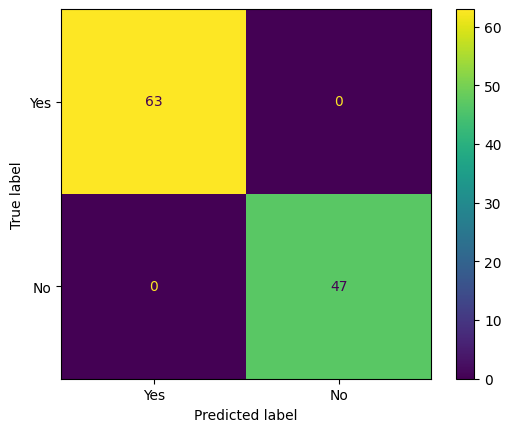

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print("Model achieved a classification accuracy of:",end='\t')
print(accuracy_score(Y_test,Y_pred))
dsp=ConfusionMatrixDisplay(confusion_matrix(Y_test,Y_pred),display_labels=["Yes","No"])
print('\n')
dsp.plot()
print("Model Confusion Matrix")
from sklearn.metrics import jaccard_score
print('\n')
print("Jaccard Similarity Score:", end='\t')
print(jaccard_score(Y_test,Y_pred))

In [22]:
# importing the relevant library for train-test-split
from sklearn.model_selection import train_test_split

# the input is all the features without the species
X = penguin_df.drop(columns = ['species'])

# the output is the species for the given features
Y = penguin_df['species']


# splitting the data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.35)

In [23]:
# using logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [24]:
# printing the accuracy of the Logistic Regression Model
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  98.95833333333334
